In [2]:
import osmnx as ox
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon
import random
import colorsys
import ipywidgets as widgets



In [3]:
def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    _out=colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)
    out=list(_out)
    out.append(1)
    return tuple(out)

In [4]:
tags = {"building": True}
place='Vilnius, Lithuania'
buildings = ox.geometries_from_bbox(54.66876839989432,54.71039173596628,25.224266052246094,25.309152603149414,tags)
tags = {'landuse':True}
landuse= ox.geometries_from_bbox(54.66876839989432,54.71039173596628,25.224266052246094,25.309152603149414,tags)
#buildings.plot()


/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  nu

In [5]:
buildings=buildings[buildings.type!='Point']
buildings=buildings[buildings.geometry.area>6e-08]

/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-5-915be5ec2b5d>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings=buildings[buildings.geometry.area>6e-08]


In [25]:
G = ox.graph_from_bbox(54.66876839989432,54.71039173596628,25.224266052246094,25.309152603149414, network_type='drive')
street_widths = {'footway' : 0.5,
                 'steps' : 0.5,
                 'pedestrian' : 0.5,
                 'path' : 0.5,
                 'track' : 0.5,
                 'service' : 2,
                 'residential' : 3,
                 'primary' : 5,
                 'motorway' : 6}
# fig, ax = ox.plot_figure_ground(G,network_type='drive', street_widths=street_widths)



/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
tags={'leisure':['park','sports_centre']}
parks=ox.geometries_from_bbox(54.66876839989432,54.71039173596628,25.224266052246094,25.309152603149414,tags)

/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
tags={'place':['square'],'highway':'pedestrian'}
pedestrian=ox.geometries_from_bbox(54.66876839989432,54.71039173596628,25.224266052246094,25.309152603149414,tags)

/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# tags={'boundary':'administrative'}
# boundary=ox.geometries_from_place(place,tags)
# boundary=boundary[boundary.admin_level!='2']
# boundary=boundary[boundary.admin_level!='4']
# boundary=boundary[boundary.admin_level!='5']
# boundary=boundary[boundary.admin_level!='6']
# boundary=boundary[boundary.type=='Polygon']
# cityboundary=boundary[boundary.name=='Vilnius']
# subboundary=boundary[boundary.admin_level=='10']

/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
tags={'waterway':True}
water=ox.geometries_from_bbox(54.66876839989432,54.71039173596628,25.224266052246094,25.309152603149414,tags)


In [11]:
tags={'tourism':True}
tourism=ox.geometries_from_bbox(54.66876839989432,54.71039173596628,25.224266052246094,25.309152603149414,tags)
tourism=tourism[tourism.type=='Polygon']

/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
tags={'historic':True}
historic=ox.geometries_from_bbox(54.66876839989432,54.71039173596628,25.224266052246094,25.309152603149414,tags)
historic=historic[historic.type=='Polygon']

/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
streetcolor=ox.plot.get_edge_colors_by_attr(G, attr="length", cmap="binary_r")

/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
bpallette=widgets.Dropdown(
    options=plt.colormaps(),
    description='edifici',
    disabled=False,
)
display(bpallette)


/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dropdown(description='edifici', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', '…

In [15]:
areapallette=widgets.Dropdown(
    options=plt.colormaps(),
    description='aree',
    disabled=False,
)
display(areapallette)

Dropdown(description='aree', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuG…

In [20]:
lt=list(set(landuse['landuse'].values))
bt=list(set(buildings['building'].values))

# summer=ox.plot.get_colors(len(lt),cmap=areapallette.value)
# landuseColors = dict(zip(lt,summer))
# autumn=ox.plot.get_colors(len(bt),cmap=bpallette.value)
# buildingColors = dict(zip(bt,autumn))
autumn=ox.plot.get_colors(9,cmap=bpallette.value)
buildingColors = dict(zip(bt,autumn))

In [23]:
lcolors=[]
lhcolors=[]
hlcolors=[]

for i,r in landuse.iterrows():   
    if type(r['landuse'])=='grass':
        lcolors.append('#ccebc5')
        hlcolors.append(scale_lightness('#8AEA92',0.75))  
    else: 
        c=landuseColors[r['landuse']]
        lcolors.append(c)
        hlcolors.append(tuple((scale_lightness(c[:3],1.5))))
landuse['colors']=lcolors
landuse['hcolors']=hlcolors

# bcolors=[]
# for i,r in buildings.iterrows():        
#     if type(r['building'])==str:
#         bcolors.append(buildingColors[r['building']])
#     else:
#         bcolors.append('#C3423F')
# buildings['colors']=bcolors

#random
bcolors=[]
for i,r in buildings.iterrows():        
    if type(r['building'])==str:
        bcolors.append(random.choice(autumn))
    else:
        bcolors.append('#C3423F')
buildings['colors']=bcolors


pcolors=[]
for i,r in parks.iterrows():
    pcolors.append('#ccebc5')
parks['colors']=pcolors


/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


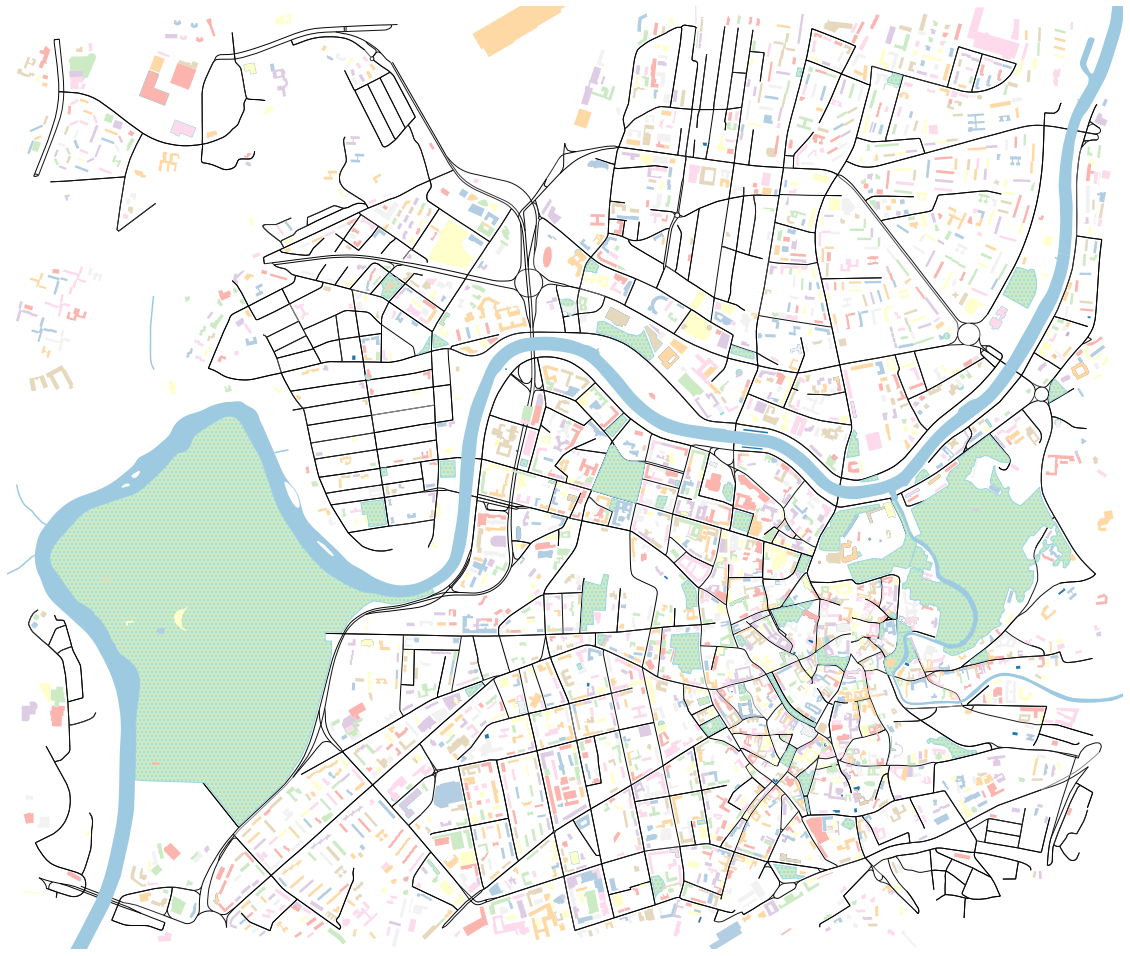

In [26]:
fig, ax =plt.subplots(figsize=(20,20))
#ax.set_facecolor('#EFEEDE')
#cityboundary.plot(ax=ax,color='white',edgecolor='black',zorder=1)
#subboundary.plot(ax=ax,cmap="Pastel2",zorder=1)

#landuse.plot(ax=ax,color=landuse.colors,zorder=2)
parks.plot(ax=ax,color=parks.colors,edgecolor='#99d6df',hatch='...',zorder=3)
tourism.plot(ax=ax)
historic.plot(ax=ax,cmap='Accent')
buildings.plot(ax=ax,color=buildings.colors,zorder=4)
#pedestrian.plot(ax=ax,color='#999999'zorder=5)
water.plot(ax=ax,color='#9ecae1',zorder=6)
ox.plot_graph(G,ax=ax,edge_color=streetcolor,node_size=0,show=False, close=False)
plt.rcParams['font.family'] = 'Cookie'
# ax.annotate('Torre\nSuda',
#             xy=(.25, .5), xycoords='axes fraction',
#             horizontalalignment='center', verticalalignment='top',
#             fontsize=175,weight='heavy', zorder=7)
# ax.annotate("39°56'"+'59" N',
#             xy=(.25, .21), xycoords='axes fraction',
#             horizontalalignment='center', verticalalignment='top',
#             fontsize=50,zorder=7)
# ax.annotate("18°01'"+'55" E',
#             xy=(.25, .18), xycoords='axes fraction',
#             horizontalalignment='center', verticalalignment='top',
#             fontsize=50,zorder=7)



plt.show()

In [36]:
# fig.savefig('vilnius.jpg',dpi=200)

In [151]:
# import matplotlib.font_manager as font_manager

# from matplotlib import font_manager

# font_path = '/usr/share/fonts/Cookie-Regular.ttf'
# font_manager.fontManager.addfont(font_path)
# prop = font_manager.FontProperties(fname=font_path)

# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = prop.get_name()


In [19]:
bt

/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['train_station',
 'kindergarten',
 'residential',
 'university',
 'transportation',
 'hospital',
 'yes',
 'public',
 'retail',
 'court',
 'sports_centre',
 'school',
 'garage',
 'college',
 'detached',
 'apartments',
 'shed',
 'cathedral',
 'hangar',
 'stadium',
 'house',
 'supermarket',
 'roof',
 'office',
 'garages',
 'construction',
 'military',
 'commercial',
 'hotel',
 'dormitory',
 'government',
 'parking',
 'industrial',
 'civic',
 'ruins',
 'church']